In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler=MinMaxScaler()
df=pd.read_csv("daily")
temp_df=df.copy(deep=True)
temp_df["season"].replace({"Winter":0,"Spring":1,"Summer":2,
                        "Autumn":3}, inplace=True)
temp_df["weekday"].replace({"Sun":0,"Mon":1,"Tue":2,"Wed":3,"Thu":4,
                                "Fri":5,"Sat":6}, inplace=True)
temp_df["weather"].replace({"good":0,"cloudy":1,"overcast":2,"rain":3,
                                "snow":4}, inplace=True)
clean_df=temp_df.copy(deep=True)
a=temp_df.columns
a=[i for i in a if i in ["registered", "year", "casual", "instant",
    "date", "ftemp"]]
temp_df.drop(a, axis=1, inplace=True)
a=clean_df.columns
a=[i for i in a if i not in ["temp", "season", "month", "cnt", "windspeed"]]
clean_df.drop(a, axis=1, inplace=True)

In [ ]:
sns.heatmap(temp_df.corr().round(2),annot=True)

In [ ]:
temp_df.corr()[["cnt"]].sort_values(by="cnt", ascending=False)

In [ ]:
sns.pairplot(clean_df)

In [ ]:
x=clean_df[["month", "season", "temp", "windspeed"]]
x["month"]=pd.Categorical(x["month"])
x["season"]=pd.Categorical(x["season"])
x=pd.get_dummies(data=x)
y=clean_df["cnt"]

In [ ]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.4, 
                                                random_state=1)
model=LinearRegression()
model.fit(xtrain, ytrain)
print(model.intercept_)
coef_par=pd.DataFrame(model.coef_, x.columns,columns=["coefficient"])
pred=model.predict(xtest)
sns.regplot(ytest, pred)

In [ ]:
xtrainsm=sm.add_constant(xtrain)
xtrainsm=sm.add_constant(xtrain)
ls=sm.OLS(ytrain, xtrainsm).fit()
print(ls.summary())

Similar bike dataset testing

In [ ]:
temp_df=df.copy(deep=True)
temp_df["season"].replace({"Winter":0,"Spring":1,"Summer":2,
                        "Autumn":3}, inplace=True)
temp_df["weekday"].replace({"Sun":0,"Mon":1,"Tue":2,"Wed":3,"Thu":4,
                                "Fri":5,"Sat":6}, inplace=True)
temp_df["weather"].replace({"good":0,"cloudy":1,"overcast":2,"rain":3,
                                "snow":4}, inplace=True)
a=df.columns
a=[i for i in a if i in ["instant", "date", "day", "casual",
    "ftemp", "registered"]]
temp_df.drop(a, axis=1, inplace=True)
temp_df["season"]=temp_df["season"].astype("category")
temp_df["month"]=temp_df["month"].astype("category")
temp_df["weekday"]=temp_df["weekday"].astype("category")
temp_df["workingday"]=temp_df["workingday"].astype("category")
temp_df["holiday"]=temp_df["holiday"].astype("category")
temp_df["weather"]=temp_df["weather"].astype("category")
temp_df["year"]=temp_df["year"].astype("category")
temp_df=pd.get_dummies(temp_df, drop_first=True)

In [ ]:
# Visualise the numerical values to see if there's any relation
temp_df_num=temp_df[["temp", "hum", "windspeed", "cnt"]]
sns.pairplot(temp_df_num, diag_kind="kde")

In [ ]:
# Visualise the categorical values to see the distribution
plt.figure(figsize=(25,10))
plt.subplot(2,3,1)
sns.boxplot(x="season", y="cnt", data=df)
plt.subplot(2,3,2)
sns.boxplot(x="month", y="cnt", data=df)
plt.subplot(2,3,3)
sns.boxplot(x="weekday", y="cnt", data=df)
plt.subplot(2,3,4)
sns.boxplot(x="workingday", y="cnt", data=df)
plt.subplot(2,3,5)
sns.boxplot(x="holiday", y="cnt", data=df)
plt.subplot(2,3,6)
sns.boxplot(x="weather", y="cnt", data=df)


In [ ]:
plt.figure(figsize=(25,20))
matrix=np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix)
plt.show()
print(df.corr()[["cnt"]].sort_values(by="cnt", ascending=False))

In [ ]:
x=["temp", "hum", "windspeed", "cnt"]
temp_df[x]=scaler.fit_transform(temp_df[x])

In [ ]:
xtrain=temp_df
ytrain=temp_df["cnt"]

In [234]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)
rfe=RFE(lm)
rfe=rfe.fit(xtrain, ytrain)
list(zip(xtrain.columns, rfe.support_, rfe.ranking_))
col=xtrain.columns[rfe.support_]
xtrain_rfe=xtrain[col]
#xtrain_rfe.drop("cnt", axis=1, inplace=True)
vif=pd.DataFrame()
vif["Features"]=xtrain_rfe.columns
vif["vif"]=[variance_inflation_factor(xtrain_rfe.values, i) for
            i in range(xtrain_rfe.shape[1])]
vif["vif"]=round(vif["vif"],2)
vif=vif.sort_values(by="vif", ascending=False)
vif

,Features,vif
6,month_9,inf
7,month_10,inf
8,month_11,inf
11,season_3,inf
1,cnt,7.27
10,season_2,4.90
9,season_1,4.69
13,workingday_1,3.11
0,windspeed,2.82
2,month_3,2.11


In [237]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)
rfe=RFE(lm)
rfe=rfe.fit(xtrain, ytrain)
list(zip(xtrain.columns, rfe.support_, rfe.ranking_))
col=xtrain.columns[rfe.support_]
xtrain_rfe=xtrain[col]
xtrain_rfe.drop(["cnt", "month_9"], axis=1, inplace=True)
vif=pd.DataFrame()
vif["Features"]=xtrain_rfe.columns
vif["vif"]=[variance_inflation_factor(xtrain_rfe.values, i) for
            i in range(xtrain_rfe.shape[1])]
vif["vif"]=round(vif["vif"],2)
vif=vif.sort_values(by="vif", ascending=False)
vif

,Features,vif
8,season_2,3.54
7,season_1,3.46
9,season_3,3.46
11,workingday_1,2.81
0,windspeed,2.69
5,month_10,2.04
1,month_3,2.02
2,month_4,2.00
4,month_7,2.00
6,month_11,2.00


In [ ]:
xtrain_lm1=sm.add_constant(xtrain_rfe)
lr1=sm.OLS(ytrain,xtrain_lm1).fit()
print(lr1.params)
print(lr1.summary())

In [239]:
a=xtrain_rfe.columns
final=temp_df[a]
final_y=temp_df["cnt"]
xtestlm6=sm.add_constant(final)
ypred=lr1.predict(xtestlm6)

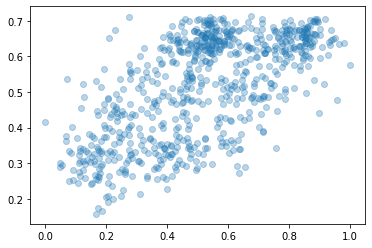

In [245]:
fig=plt.figure()
plt.scatter(final_y, ypred, alpha=0.3)
plt.show()

In [242]:
from sklearn.metrics import r2_score

In [243]:
r2_score(final_y, ypred)

0.4086163245100449